## Problem set 1, Intro to NLP, 2017

#### This is due on September 22nd at 11PM. Please see detailed submission instructions below.  100 points total.

##### How to do this problem set:

- What version of Python should I use? 2.7

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out a supporting file, `hw_1.py`.

- For all of the textual answers you have to fill out have placeholder text which says "Answer in one or two sentences here." For each question, you need to replace "Answer in one or two sentences here" with your answer.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `hw_1.py` and `hw_1.ipynb` on Moodle.
  
- **Important:** Check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipyhton notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. You are responsible for checking for these errors. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf hw_1.ipynb` to identify and fix any syntax errors that might be causing problems.

- **Important:** When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One convenient way to do this is by clicking `Cell -> Run All` in the notebook menu.
 
- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### Academic honesty 

- We will audit the Moodle code from a few dozen students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your Gradescope PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a potential case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is considered a serious case of cheating.

In [1]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
from __future__ import division  # this line is important to avoid unexpected behavior from division

# This code imports your work from hw_1.py
from hw_1 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# download the IMDB large movie review corpus from the class webpage to a file location on your computer

PATH_TO_DATA = 'large_movie_review_dataset'  # set this variable to point to the location of the IMDB corpus on your computer
POS_LABEL = 'pos'
NEG_LABEL = 'neg'
TRAIN_DIR = os.path.join(PATH_TO_DATA, "train")
TEST_DIR = os.path.join(PATH_TO_DATA, "test")

for label in [POS_LABEL, NEG_LABEL]:
    if len(os.listdir(TRAIN_DIR + "/" + label)) == 12500:
        print "Great! You have 12500 {} reviews in {}".format(label, TRAIN_DIR + "/" + label)
    else:
        print "Oh no! Something is wrong. Check your code which loads the reviews"

Great! You have 12500 pos reviews in large_movie_review_dataset/train/pos
Great! You have 12500 neg reviews in large_movie_review_dataset/train/neg


In [3]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print open(TRAIN_DIR + "/neg/3740_2.txt").read()

Right away, this film was ridiculous. Not that it didn't have redeeming aspects For example, the best thing about this film was the beautiful background scenery. Anyone not living on the East Coast should know the South doesn't have beautiful mountains like those found in the West. I knew it was Utah right off the bat, but perhaps Dalton couldn't suppress his English accent, so they had to excuse it by saying this was a southern town. Subverting his accent into a Southern one was easier. Sure the film has plot twists, but its phony sense of place was something I couldn't get past. It's not like Utah doesn't have meth labs... so why the writers thought it necessary to pretend it was in the South is beyond me. <br /><br />One other thing in action pictures always puzzles me. Why do they always make the "cocking" sound effect when the character pulls out an automatic handgun? It seemed every other sound effect in this movie was a "chuk-chich" signifying a 9mm was loaded and ready to fire

## Part One: Intro to NLP in Python: types, tokens and Zipf's law

#### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. You will have a chance to improve this for extra credit at the end of the assigment. Take a look at the `tokenize_doc` function in `hw_1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [4]:
# We have provided a tokenize_doc function in hw_1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("Computer science is both practical and abstract.")
for b in bow2:
    print b

and
both
computer
abstract.
science
is
practical


**Question 1.1 (5 points)**

Now we are going to count the word types and word tokens in the corpus. In the cell below, use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. 

`word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["dog"]` should store the number 990 -- the count of how many times the word `dog` appears in the corpus.

In [5]:
import glob
word_counts = defaultdict(float)  # you might want to use a defaultdict instead https://docs.python.org/2/library/collections.html
                  # defaultdicts are often useful for NLP in python


for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            fp=open(fn,'r')
            #print "Working??"+ str(fn)
            data=fp.read()
            doc_tokens=tokenize_doc(data)
            for token in doc_tokens.keys():
                word_counts[token]+=doc_tokens[token]


In [6]:
# you should see 990 instances of the word type "dog" in the corpus. (updated 9/13)
if word_counts["dog"] == 990:
    print "yay! there are {} total instances of the word type dog in the corpus".format(word_counts["dog"])
else:
    print "hrm. Something seems off. Double check your code"

yay! there are 990.0 total instances of the word type dog in the corpus


**Question 1.2 (5 points)**

Fill out the functions `n_word_types` and `n_word_tokens` in `hw_1.py`. These functions return the total number of word types and tokens in the corpus. **important** The autoreload "magic" that you setup early in the assignment should automatically reload functions as you make changes and save. If you run into trouble you can always restart the notebook and clear any .pyc files.

In [7]:
print "there are {} word types in the corpus".format(n_word_types(word_counts))
print "there are {} word tokens in the corpus".format(n_word_tokens(word_counts))

there are 391997 word types in the corpus
there are 11557403.0 word tokens in the corpus


**Question 1.3 (5 points)**

You should see a much higher number of tokens than types. Why is that? 

Words very often repeat in sentences. So the number of different kinds of words ("word_types") will be less than the total words used ("word_tokens"). (As an example, the token 'words' (one word_type) appears three times in my last 2 sentences of the answer).

#### Zipf's Law

**Question 1.4 (5 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is *log(frequency)*.  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.) You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

*Please remember to label the meaning of the x-axis and y-axis.*

[('the', 638845.0), ('a', 316607.0), ('and', 313603.0), ('of', 286653.0), ('to', 264569.0), ('is', 204867.0), ('in', 179802.0), ('i', 141578.0), ('this', 138477.0), ('that', 130133.0)]


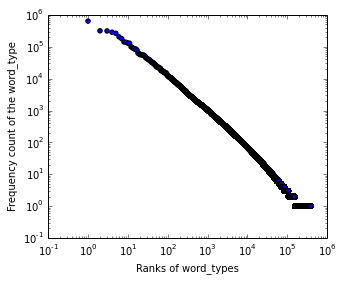

In [8]:
import math
x = []
y = []
X_LABEL = "Ranks of word_types"
Y_LABEL = "Frequency count of the word_type"

# implement me! you should fill the x and y arrays. Add your code here

tup_wc=word_counts.items()
tup_wc.sort(key=lambda tup: tup[1],reverse=True)
count=1
for tup in tup_wc:
    x.append(count)
    y.append(tup[1])
    count+=1
print tup_wc[0:10]
plt.scatter(x, y)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.yscale('log')
plt.xscale('log')

**Question 1.5 (5 points)**

You should see some discountinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?

The discontinuity on the left denotes that the difference between word counts initially is very high (so high that it is noticeable even on a log-log scale .Like 'that' appears 6Lakh times while the next rank 'a' appears 3Lakh times roughly half of the previous one). The ones on the right show that the frequency falls off very rapidly as we approach uncommon words. The drop is noticeable as discontinuities. The ledges on the right denote words, having same frequencies (As an example rare words are used only once in the whole corpus and all these have frequency as 1). They effectively all share the same rank.

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between postive and negative reviews (at some level of accuracy).

**Question 2.1 (5 pts) ** To start, implement the `update_model` function in `hw_1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model`, run the train model function using the code below. You’ll need to provide the path to the dataset you downloaded to run the code.

In [9]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()

if len(nb.vocab) == 252165:
    print "Great! The vocabulary size is {}".format(252165)
else:
    print "Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?"

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 12500.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 12500.0
NUMBER OF TOKENS IN POSITIVE CLASS: 2958730.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 2885734.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 252165
Great! The vocabulary size is 252165


#### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Use the provided `top_n` function to find the top 10 most common words in the positive class and top 10 most common words in the negative class. You don't have to code anything to do this.

In [10]:
print "TOP 10 WORDS FOR CLASS " + POS_LABEL + ":"
for tok, count in nb.top_n(POS_LABEL, 10):
    print '', tok, count
print ''

print "TOP 10 WORDS FOR CLASS " + NEG_LABEL + ":"
for tok, count in nb.top_n(NEG_LABEL, 10):
    print '', tok, count
print ''

TOP 10 WORDS FOR CLASS pos:
 the 165803.0
 and 87022.0
 a 82054.0
 of 76155.0
 to 65869.0
 is 55785.0
 in 48420.0
 i 33143.0
 it 32795.0
 that 32702.0

TOP 10 WORDS FOR CLASS neg:
 the 156385.0
 a 77895.0
 and 71534.0
 of 68304.0
 to 68097.0
 is 48385.0
 in 42103.0
 i 37335.0
 this 37301.0
 that 33585.0



**Question 2.2 (5 points)**

Will the top 10 words of the positive/negative classes help discriminate between the two classes? Do you imagine that processing other English text will result in a similar phenomenon?

No, they won't. Using these as features will not help in classifying because these are common words of English and will occur in both the types of reviews. Processing other English text will also result in a similar top_words of classes and they also won't be useful in classifying.

**Question 2.3 (5 pts) **

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “fantastic” given each sentiment label. Repeat the computation for the word “boring.” 

In [11]:
print "P('fantastic'|pos):",  nb.p_word_given_label("fantastic", POS_LABEL)
print "P('fantastic'|neg):",  nb.p_word_given_label("fantastic", NEG_LABEL)
print "P('boring'|pos):",  nb.p_word_given_label("boring", POS_LABEL)
print "P('boring'|neg):",  nb.p_word_given_label("boring", NEG_LABEL)

P('fantastic'|pos): 0.000154458162793
P('fantastic'|neg): 3.77720191813e-05
P('boring'|pos): 6.18508616873e-05
P('boring'|neg): 0.000287275265149


Which word has a higher probability given the positive class, fantastic or boring? Which word has a higher probability given the negative class? Is this what you would expect?

'fantastic' for +ve class and 'boring' for -ve class. It is the expected outcome.

**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "car-thievery" in the positive training data and negative training data.

In [12]:
print "P('car-thievery'|pos):",  nb.p_word_given_label("car-thievery", POS_LABEL)
print "P('car-thievery'|neg):",  nb.p_word_given_label("car-thievery", NEG_LABEL)
#print "P('cliche'|neg):",  nb.p_word_given_label("cliche", NEG_LABEL)

P('car-thievery'|pos): 3.3798285075e-07
P('car-thievery'|neg): 0.0


What do you notice about "P('car-thievery'|neg)"? Why do you see this number? What would happen if we took the log of "P('car-thievery'|neg)"? What would happen if we multiplied "P('car-thievery'|neg)" by "P('cliche'|neg)"? Why might these operations cause problems for a Naive Bayes classifier?

P('car-thievery'|neg)=0.0 because the phrase 'car-thievery' does not occur in any negatively tagged document of the corpus. Zeros cause a problem, because taking logarithms is common in NLP and log(0) makes the result as -ve infinity. And even 'one' such term like this, will make the whole product zero (when multiplied by P('car-thievery'|neg)). Thus because of one such a non-existent phrase many of our probabilities become 0

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with psuedocounts. A psuedocount is a fixed amount added to the count of each word stored in our model. Psuedocounts are used to help smooth calculations involving words for which there is little data. Implement
`p_word_given_label_and_psuedocount` and then run the next cell. Hint: look at the slides from the lecture on pseudocounts.

In [13]:
print "P('car-thievery'|neg):",  nb.p_word_given_label_and_pseudocount("car-thievery", NEG_LABEL, 1.0)

P('car-thievery'|neg): 3.18684572066e-07


**Question 2.6 (getting ready for question 2.10)**

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with prob- abilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the `log_likelihood` function (Hint: it should make calls to the p word given label and psuedocount function).
Implement the `log_prior` function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

There is nothing to print out for this question. But you will use these functions in a moment...

**Question 2.7 (5 pts) **

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using bayes rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all your missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$. You will have to use "MathJax" to write out the equations. MathJax is very similar to LaTeX. 99% of the MathJax you will need to write for this course (and others at U Mass) is included in the first answer of [this](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) tutorial. MathJax and LaTeX can be annoying first, but once you get a little practice, using these tools will feel like second nature.


Derive the normalizer by expanding $P(\mathbf{w_d})$. Fill out the answer with MathJax here

$P(\mathbf{w_d})$=$P(\mathbf{w_1, w_2, ...w_dn})$=$P(\mathbf{w_1})$*$P(\mathbf{w_2}*....)$=$\prod_{i=1}^n P(\mathbf{w_di})$

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?

Normalizer is like a constant term, which is same for both labels. I think it of as a term to bring back the numerator, with range 0 to 1. Since, we are just comparing terms, the common normalizer for both the terms should NOT be a problem and the raw_unnormalized version should be enough for classification.

**Question 2.9 (15 pts)**

Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy. `evaluate_classifier_accuracy` is implemented for you so you don't need to change that method.

In [14]:
print nb.evaluate_classifier_accuracy(1.0)

82.94


**Question 2.10 (5 pts)**

Try evaluating your model again with a pseudocount parameter of 500.

In [15]:
print nb.evaluate_classifier_accuracy(500.0)

79.836


Does the accuracy go up or down when the pseudo count parameter is raised to 500? Why do you think this is?

It goes DOWN. Maybe because, a high alpha like 500 starts to become comparable with the count term in the probability. Higher alphas lead to too much smoothing. This is bad, because now all words start to get more-or-less similar probabilities (As an exaggerated example, when we put alpha like a million, the other terms don't matter. Each word will get uniform probability.)

**Question 2.11 (5 pts)**

Our trained model can be queried to do exploratory data analysis. We
saw that the top 10 most common words for each class were not very
discriminative. Often times, a more descriminative statistic is a
word's likelihood ratio. A word's likelihood ratio is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with $LR=5$ is five times more likely to appear in a positive
review than it is in a negative review; a word with $LR=0.33$ is one
third as likely to appear in a positive review than a negative review

In [16]:
# Implement the nb.likelihod_ratio function and use it to investigate the likelihood ratio of "fantastic" and "boring"
print "LIKEHOOD RATIO OF 'fantastic':", nb.likelihood_ratio('fantastic', 1.0)
print "LIKEHOOD RATIO OF 'boring':", nb.likelihood_ratio('boring', 1.0)
print "LIKEHOOD RATIO OF 'the':", nb.likelihood_ratio('the', 1.0)
print "LIKEHOOD RATIO OF 'to':", nb.likelihood_ratio('to', 1.0)


LIKEHOOD RATIO OF 'fantastic': 4.06898088596
LIKEHOOD RATIO OF 'boring': 0.216646954101
LIKEHOOD RATIO OF 'the': 1.03611983814
LIKEHOOD RATIO OF 'to': 0.94529239345


Does it make sense that $LR$('fantastic') $>$ $LR$('to')? 

'fantastic' is more prevalent in positive reviews and not present in negative reviews wheras the word 'to' is present in both types of documents. Thus the word 'fantastic' is more clearly able to classify the documents while the universailty of the word 'to' makes it a weak feature.

** Question 2.12 (15 pts)** 

Find a review that your classifier got wrong. 

In [17]:
# in this cell, print out a review that your classifier got wrong. Print out the text of the review along with the label
nb.print_wrong_review(1.0)
print "LIKEHOOD RATIO OF 'fail':", nb.likelihood_ratio('fail', 1.0)
print "LIKEHOOD RATIO OF 'surprise':", nb.likelihood_ratio('surprise', 1.0)
print "LIKEHOOD RATIO OF 'low-budget':", nb.likelihood_ratio('low-budget', 1.0)
print "LIKEHOOD RATIO OF 'bad':", nb.likelihood_ratio('bad', 1.0)


actual label: pos
predicted label: neg
This movie would had worked much better if this was the first Critters movie, this is a low-budget movie with only two (2) Critters shown on-screen. Why this looks like a fail is because this is the last Critters movie and it's so low-budget that it seems the director made the whole movie with his own pocket money. However, I did like this movie, I compare it mostly with the third movie (which were bad). Critters 4 have a more serious tone in it, the first half of the movie (even without seeing one Critter yet) you have a scary feeling watching it, too bad they didn't "milk" out the Critters, I mean even if they only had two (2) puppets they could still have used them on-screen a lot more. The Critters also have different deaths in this movie which made this a little special, especially at the end with the frozen Critter. Ug has a promotion in this part and is different in this movie which took me by surprise. Lastly I liked this one because it al

What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly? 

Many times words like 'fail' and 'bad' are present in the review. | Expanding the context helps. "Looks like a fail", "which were bad" phrases might help in classifying it correctly as positive.


There is a lot of -ve criticism for the prequels of the Critters franchise | Identifying the proper subject of the sentences helps associate the -ve criticism to the earlier films of the franchise and not this current film.

**Extra credit (up to 10 points) **

If you don't want to do the extra credit, you can stop here! Otherwise... keep reading... 
 
In this assignment, we use whitespace tokenization to create a bag-of-unigrams representation for the movie reviews. It is possible to improve this represetation to improve your classifier's performance. Use your own code or an external library such as nltk to perform tokenization, text normalization, word filtering, etc. Fill out your work in `def tokenize_doc_and_more` (below) and then show improvement by running the following.

`nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(1.0)
`

Roughly speaking, the larger performance improvement, the more extra credit. However, doing a good job investigating, explaining and justifying your work with small experiments and comments is also extremely important. Make sure to describe what you did and analyze why your method works. Use this ipython notebook to show your work.

In [18]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def replace_punctuation(doc): #doc is a string
    puncts='.,'#Want to remove comma and fullstop
    for punct in puncts:
        doc=doc.replace(punct,' ')
    return doc
    #Gave an accuracy of 81.84 
    
def tokenize_doc_and_more(doc):
    """
    Return some representation of a document.
    At a minimum, you need to perform tokenization, the rest is up to you.
    """
    # Implement me!
    bow = defaultdict(float)
    doc = unicode(doc, 'utf-8')
    doc=doc.lower()
    #doc=replace_punctuation(doc)
    # your code goes here
    #wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens=word_tokenize(doc)
    stop_words1=set(stopwords.words('english'))
    word_tokens = [w for w in word_tokens if not w in stop_words1]
    #word_tokens=[wordnet_lemmatizer.lemmatize(w) for w in word_tokens]
    #word_tokens_2=[]
    #for i in range(len(word_tokens)-1):
    #    word_tokens_2.append(word_tokens[i]+" "+word_tokens[i+1])
    #    i+=1
    for token in word_tokens:
        bow[token]+=1.0
    #return dict(bow)
    return bow

In [19]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc_and_more)
nb.train_model()
nb.evaluate_classifier_accuracy(13)

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 12500.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 12500.0
NUMBER OF TOKENS IN POSITIVE CLASS: 2156724.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 2116501.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 114545


83.888

Use cells at the bottom of this notebook to explain what you did in `better_tokenize_doc`. Include any experiments or explanations that you used to decide what goes in your function. 

In [20]:
# Your experiments and explanations go here
#Only nltk_tokenizer:
#alpha: 3.1: 82.5
#alpha:   1: 82.208
#alpha:   2: 82.388
#alpha:   4: 82.572
#alpha:   5: 82.528

#tokenizer & lemmatizer:
#alpha: 1: 82.208
#alpha: 2: 82.388
#alpha: 3: 82.496
#alpha: 4: 82.572
#alpha: 5: 82.528

#tokenizer and punctuation:
#alpha: 3: 82.392
#alpha: 4: 82.492
#alpha: 5: 82.5

#bigram (i,i+1) and tokenizer:
#alpha 3: 82.936
#alpha 4: 83.004
#alpha 5: 82.932

#stop and tokenize:
#alpha: 3: 83.484
#alpha: 4: 83.592
#alpha: 5: 83.656
#alpha: 7: 83.716
#alpha: 8: 83.772
#alpha: 9: 83.824
#alpha: 10: 83.824
#alpha: 11,12: 83.868
#alpha: 13: 83.888
#alpha: 14: 83.884